# Canvassing with Google Maps

Canvassing is of a great importance in the marketing world. For simplicity, canvassing is the act of producing new leads in order to fulfill a sales target. This can be done differently for different kind of industry.

In the food delivery industry, one of the targets is to get as many merchants as possible to join the food delivery platform. This would help to be more appealing to more user as they could find a wide range of option in our platform. In this case, the lead is in the form of restaurant data in a specific area that a salesman is assigned to. Conventionally, it is done by directly visiting the target spot or manually search on the internet, for example. However, it becomes troublesome when the target number of merchants is considerably high, let's say, 50 merchants per month. Getting 50 data manually is already no vacation, let alone the fact that not all 50 will agree to join our platform. Therefore, we could use Selenium to help us getting the data that we previously need to do manually. We could even get much more than 50 data as a back up. It may take time to run the script, but spending one day to retrieve hundreds of data will be worth the time since the remaining days could be spent on focusing to approach the potential merchants from the data retrieved.

Here, I use Selenium to scrape information from Google Maps. First, we decide on the area of focus that we would like to target, direct our browser to the Google Maps url using chromedriver (as I use Chrome), and finally retrieve the information. The information needed are: name of the restaurant, its address, and its phone number. We could also add other information as long as it is available on the information card shown in Google Maps page. Dig in to the code for further details on how to do that! :)

### Importing necessary libraries

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pyforest

### Direct the webdriver to your chromedriver file path

In [ ]:
#for automating the chrome
chromedriver_path = r"C:\Users\chiri\Downloads\chromedriver.exe"
webdriver=webdriver.Chrome(executable_path=chromedriver_path)
sleep(2)

### Direct chrome to the webpage you would like to scrap. in this case, I use the keyword "Kembangan" in Google Maps and directly search the restaurants.

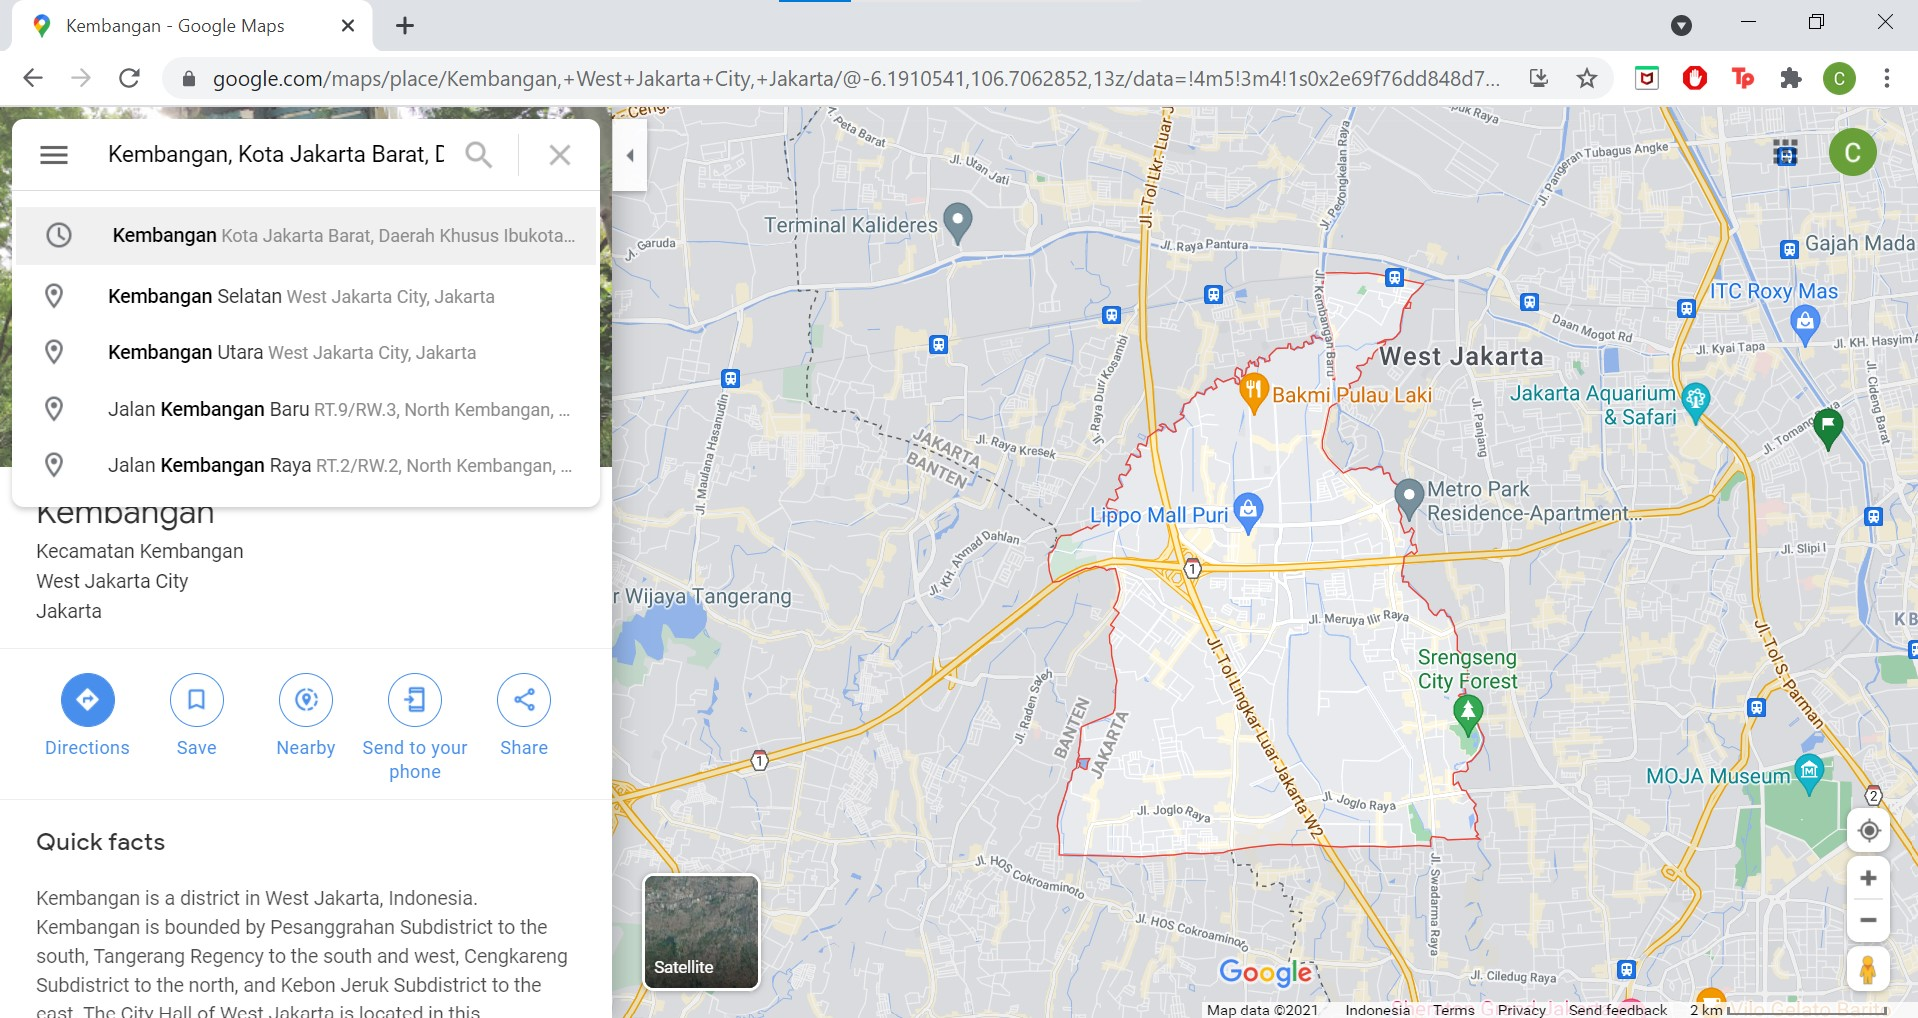

### Above, I first entered the keyword "Kembangan" and followed by clicking the "Nearby" icon, then choose "Restaurants nearby" on the search bar option.

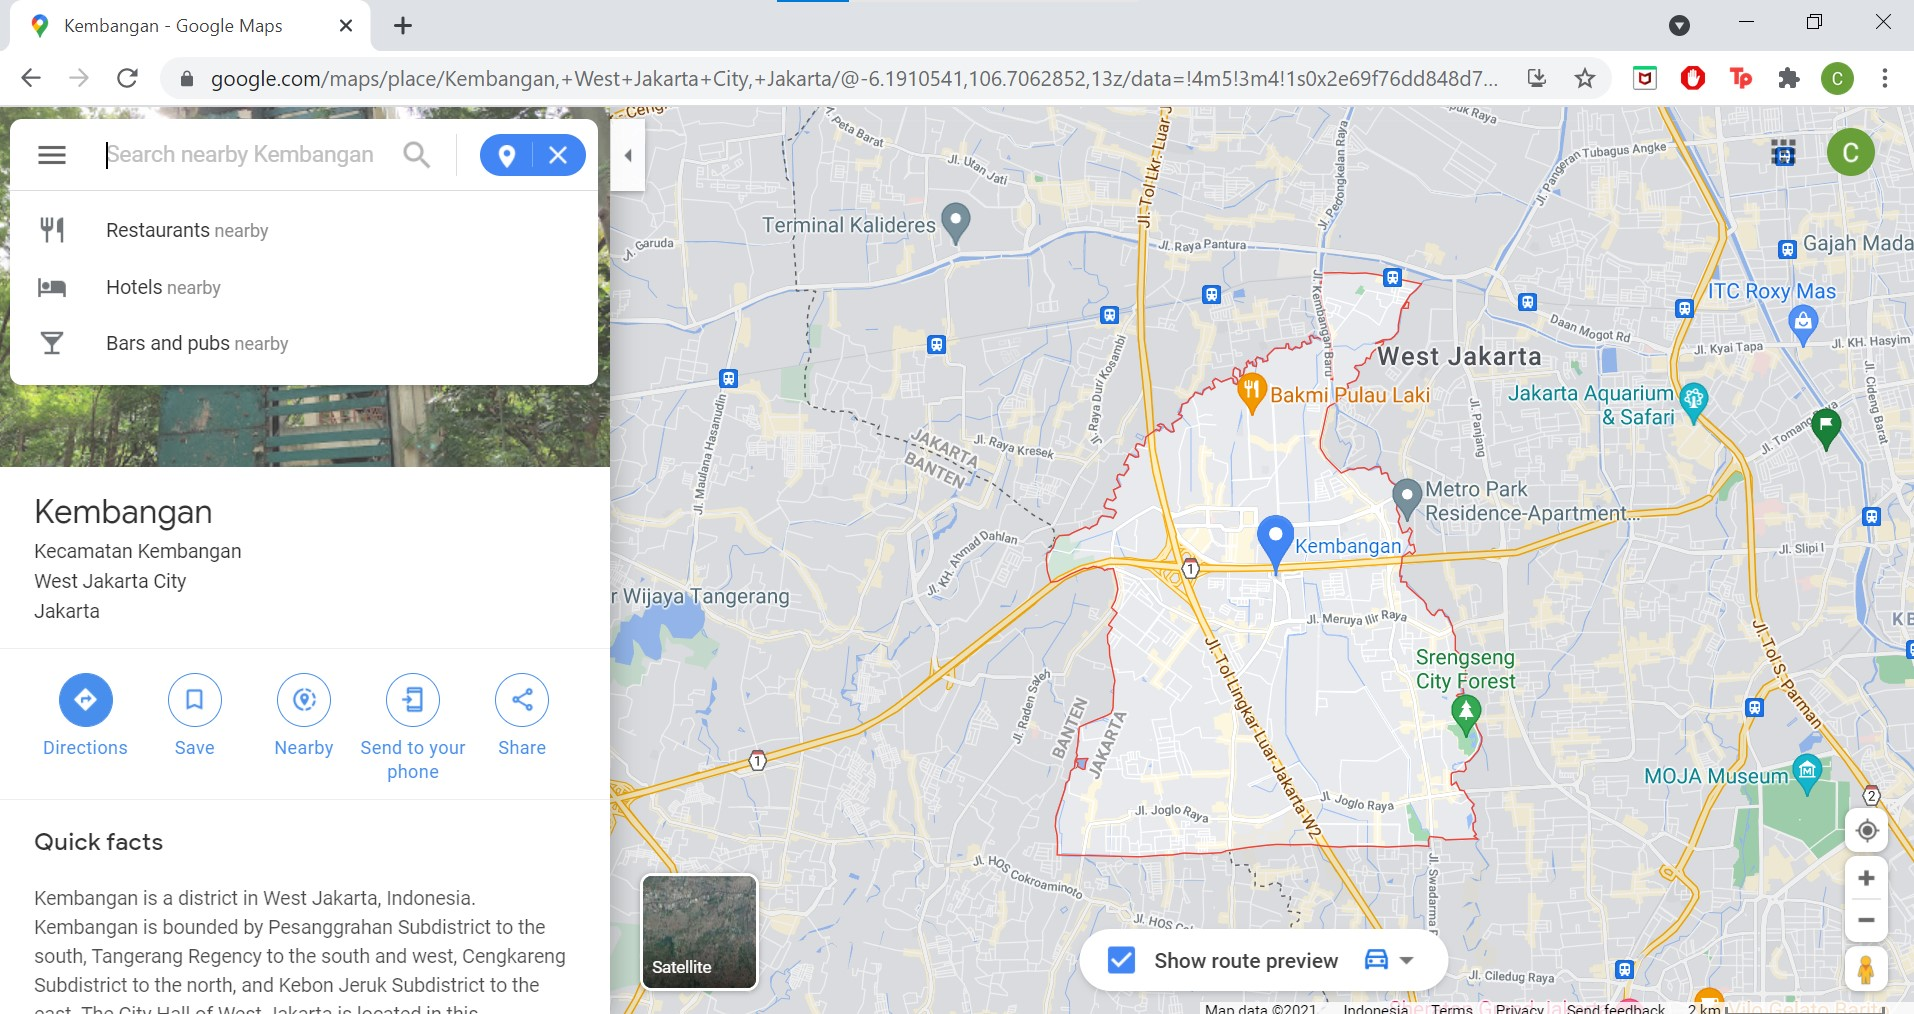

### Below is the resulted wepage and is the starting point for us to start scraping our data.

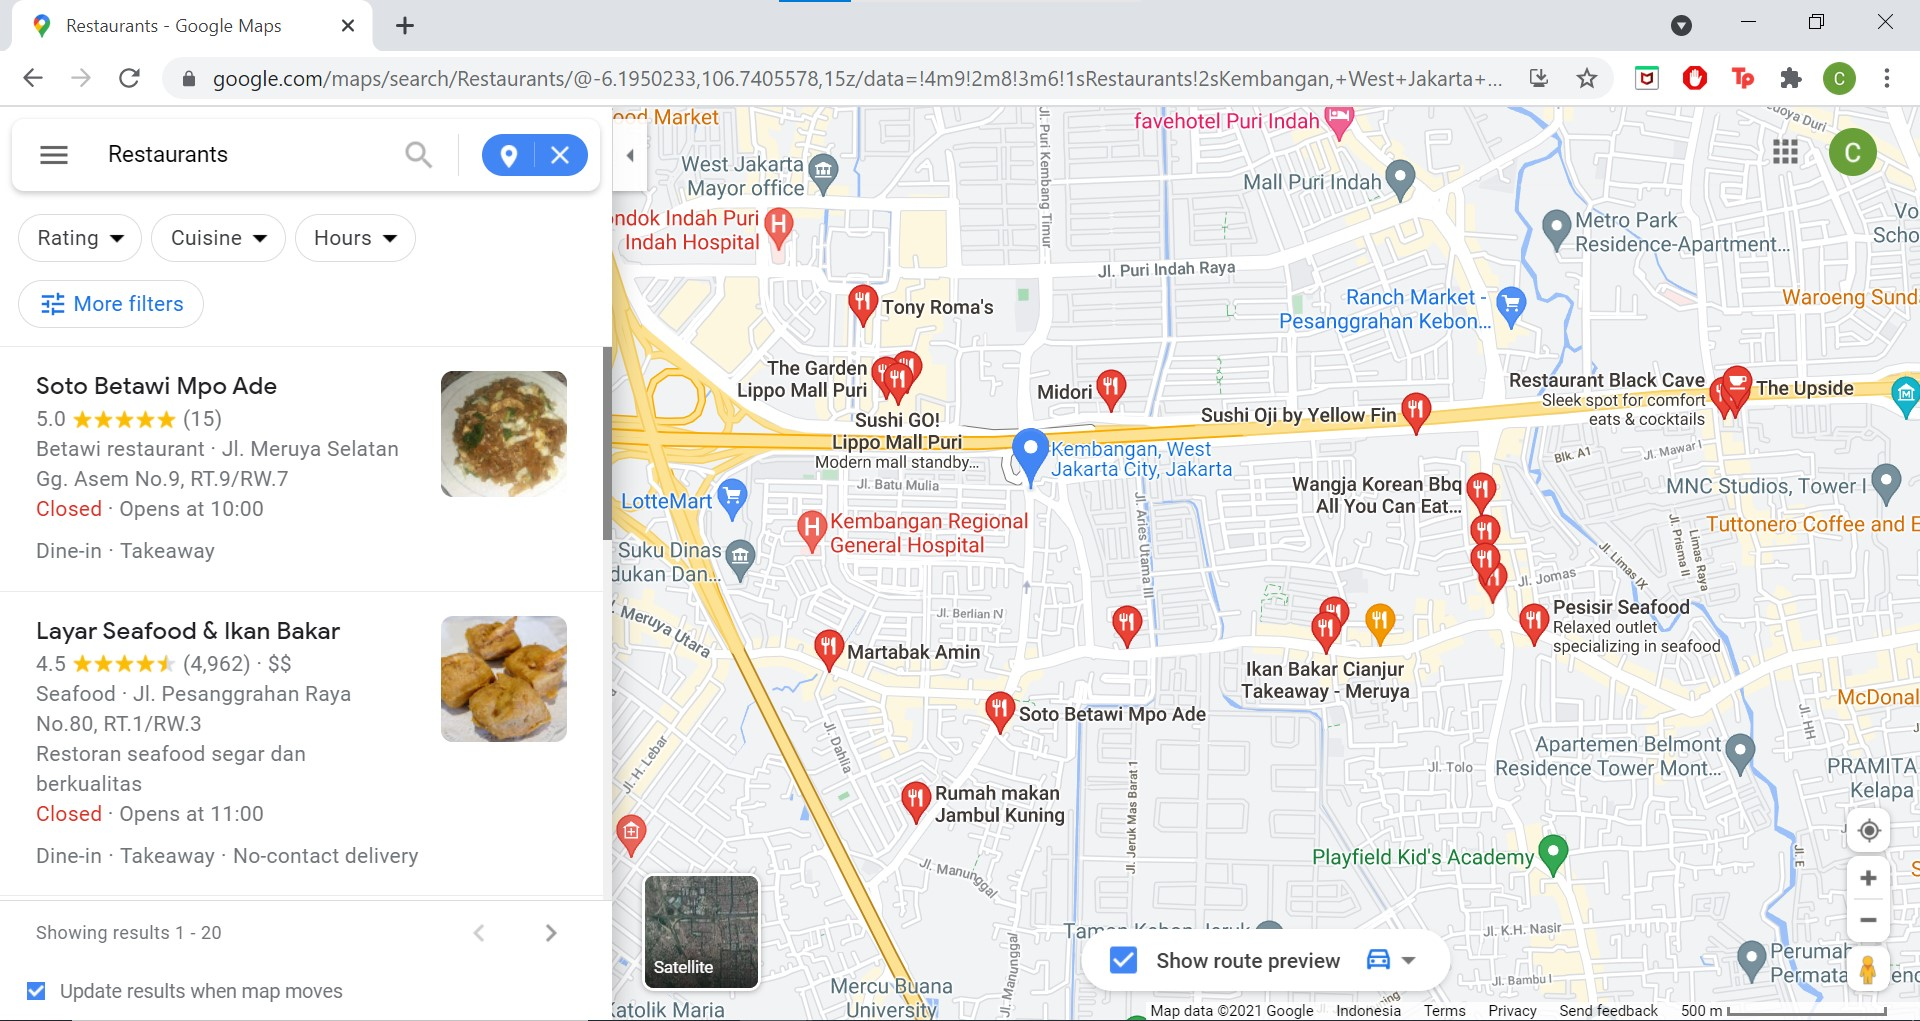

In [ ]:
webdriver.get("https://www.google.com/maps/search/Restoran/@-6.1907509,106.7235155,13z/data=!3m1!4b1!4m8!2m7!3m6!1sRestoran!2sKec.+Kembangan,+Kota+Jakarta+Barat,+Daerah+Khusus+Ibukota+Jakarta!3s0x2e69f76dd848d7a9:0x525d684aed1f9b1d!4m2!1d106.7425886!2d-6.1930379")

### First, we will retrieve only the links to the restaurants, since the phone number is not shown on the overview shown on the left part of the webpage. we need to first click the specific restaurant to be able to see the phone number. Therefore, we may as well retrieve the other information altogether later on by opening each of the restaurant's link.

In [ ]:
resto_link=[]

In [ ]:
try:
    while True:
        #there are actually 20 restaurants per page. but it will not show all 20 of them if we do not scroll it down.
        #we need to scroll the list of the restaurant to be able to see and retrieve all the restauarnts on the list. 
        scroll=webdriver.find_elements_by_class_name("section-layout.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ")
        for i in scroll:
            webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
            sleep(1)
            webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
            sleep(1)
            webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
            sleep(1)
            webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
            sleep(1)
            webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
        
        # retrieving the links. this will actually retrieve other links attached on the page.
        # we could actually just choose the element more specific so we only retrieve the restaurant's links, but I'd better to clean the links later on (as you may see on the codes after this) as for me it is easier.
        link=webdriver.find_elements_by_tag_name("a")
        for i in link:
            resto_link.append(i.get_attribute("href"))
            
        #to keep track on whether we successfully retrieve the links, or you may also just ignore this part
        print(len(resto_link))
        
        #to go to the next page, if any. Otherwise, it would return an error and this loop will continue to the except clause, which will break the loop.
        webdriver.find_elements_by_class_name("hV1iCc")[1].click()
        sleep(3)

except:
    break

In [ ]:
#cleaning the links
resto_link=[x for x in resto_link if x is not None]

error=[]

for i in resto_link:
    if "https://www.google.com/maps/place" not in i:
        error.append(i)
        
resto_link_clean=[x for x in resto_link if x not in error]

In [ ]:
#listing the data we would like to retrieve
resto_name=[]
resto_address=[]
tel=[]
link=[]

#we open the links retrieved one by one and then get the information needed
for i in resto_link_clean:
    link.append(i)
    webdriver.get(i)
    sleep(5)    
    
    #get the restaurant's name
    name=webdriver.find_element_by_class_name("x3AX1-LfntMc-header-title-title").text
    resto_name.append(name)
    print(len(resto_name))
    print(name)
    
    tex=webdriver.find_elements_by_class_name('QSFF4-text')
    for i in tex:
        # get the restaurant's address
        # you may change "Jl." and "Jalan" to other keyword(s) for address in your country. "Jl." and "Jalan" is similar to "St." or "Street".
        if "Jl." in i.text or "Jalan" in i.text:
            resto_address.append(i.text)
            print(i.text)
        # get the phone number
        # you may also change the keywords to get the phone numbers.
        if "(021)" in i.text or ("08" or "-") in i.text and "Jl." not in i.text and "Jalan" not in i.text:
            tel.append(i.text)
            print(i.text)
    
    #there is a chance that the address and/or phone number is unavailable. in that case, we give "-" value to them
    try:
        print(resto_address[len(resto_name)-1])
    except:
        resto_address.append("-")
        
    try:
        print(tel[len(resto_name)-1])
    except:
        tel.append("-")

### Reference figure of data retrieved

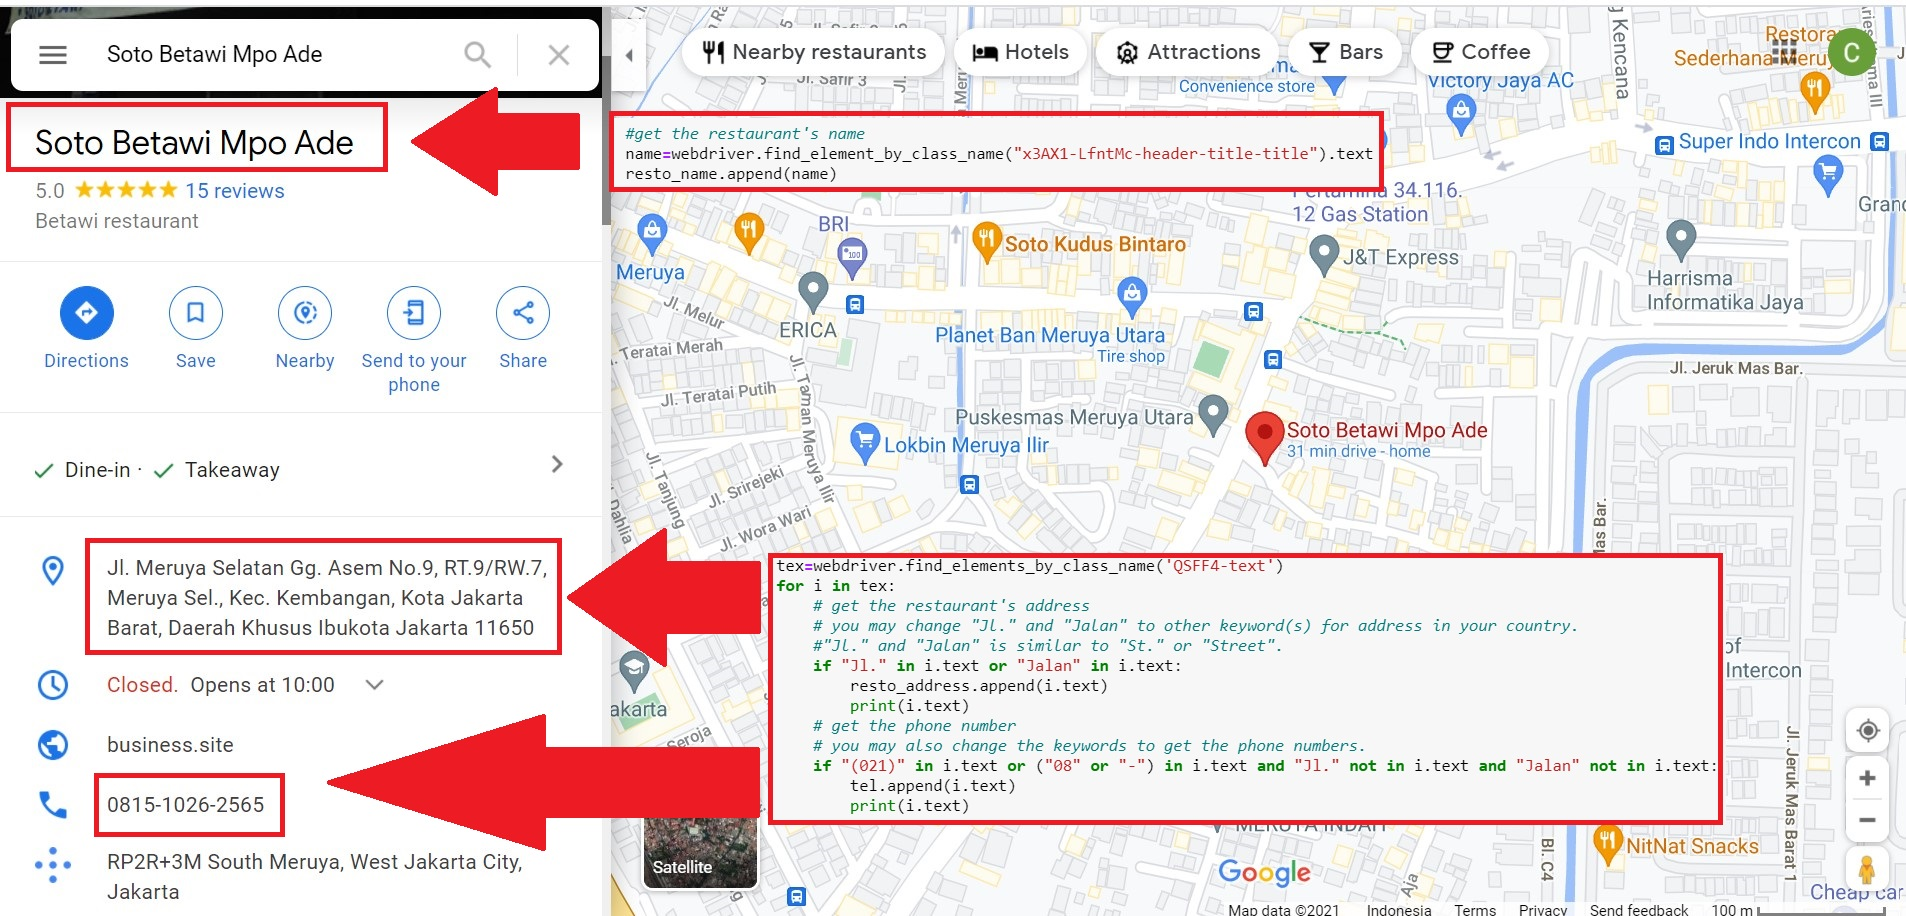

### Make a dataframe to contain the data

In [ ]:
kembangan=pd.DataFrame()
kembangan["Name"]=resto_name
kembangan["Address"]=resto_address
kembangan["Tel"]=tel
kembangan["Link"]=link

### Hereafter is data cleaning that you may suit according to your needs, i.e. deleting the unwanted data. For me, I will delete data without the keyword "Kembangan" in the address because sometimes restaurants in nearby area are also retrieved.

In [ ]:
nearby=[]
for i in range(len(kembangan)):
    if "kembangan" not in kembangan["Address"][i].lower():
        print(kembangan["Address"][i])
        nearby.append(i)

In [ ]:
kembangan_clean=kembangan.drop(nearby).reset_index().drop("index",axis=1)

In [ ]:
kembangan_zoomout=kembangan_clean["Link"].to_list()

### Links retrieved from the above procedure would only produce very few results. Google Maps will show more results when it is zoomed in. Therefore, the idea is using the restaurant links retrieved previously and then zooming in to get more results. And then, we clean the duplicated data and finally retrieve the information needed.

In [ ]:
resto_link_additional=[]

In [ ]:
for link in kembangan_zoomout:
    webdriver.get(link)
    print(link)
    
    sleep(3)
    
    #here, we find the nearby restaurant to the previously retrieved restaurant. 
    for label in webdriver.find_elements_by_tag_name("button"):
        if label.get_attribute("aria-label")=="Nearby restaurants":
            label.click()

    sleep(3)
    
    try:
        while True:
            tes=webdriver.find_elements_by_class_name("section-layout.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ")
            for i in tes:
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
            coba=webdriver.find_elements_by_tag_name("a")
            
            for i in coba:
                resto_link_additional.append(i.get_attribute("href"))
            print(len(resto_link_additional))
            webdriver.find_elements_by_class_name("hV1iCc")[1].click()
            sleep(3)
    except:
        pass
    
    sleep(2)
    
    try:
        #zooming in the maps to show even more results
        for i in webdriver.find_elements_by_tag_name("button"):
            if i.get_attribute("aria-label")=="Zoom in":
                i.click()
                print("zooming in")
                break
    except:
        pass
    
    sleep(2)

    try:
        while True:
            tes=webdriver.find_elements_by_class_name("section-layout.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ")
            for i in tes:
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
                sleep(1)
                webdriver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight',i)
            coba=webdriver.find_elements_by_tag_name("a")
            for i in coba:
                resto_link_additional.append(i.get_attribute("href"))
            webdriver.find_elements_by_class_name("hV1iCc")[1].click()
            sleep(3)
    except:
        pass
    

### Reference figure for "Nearby restaurants and Zoom in"

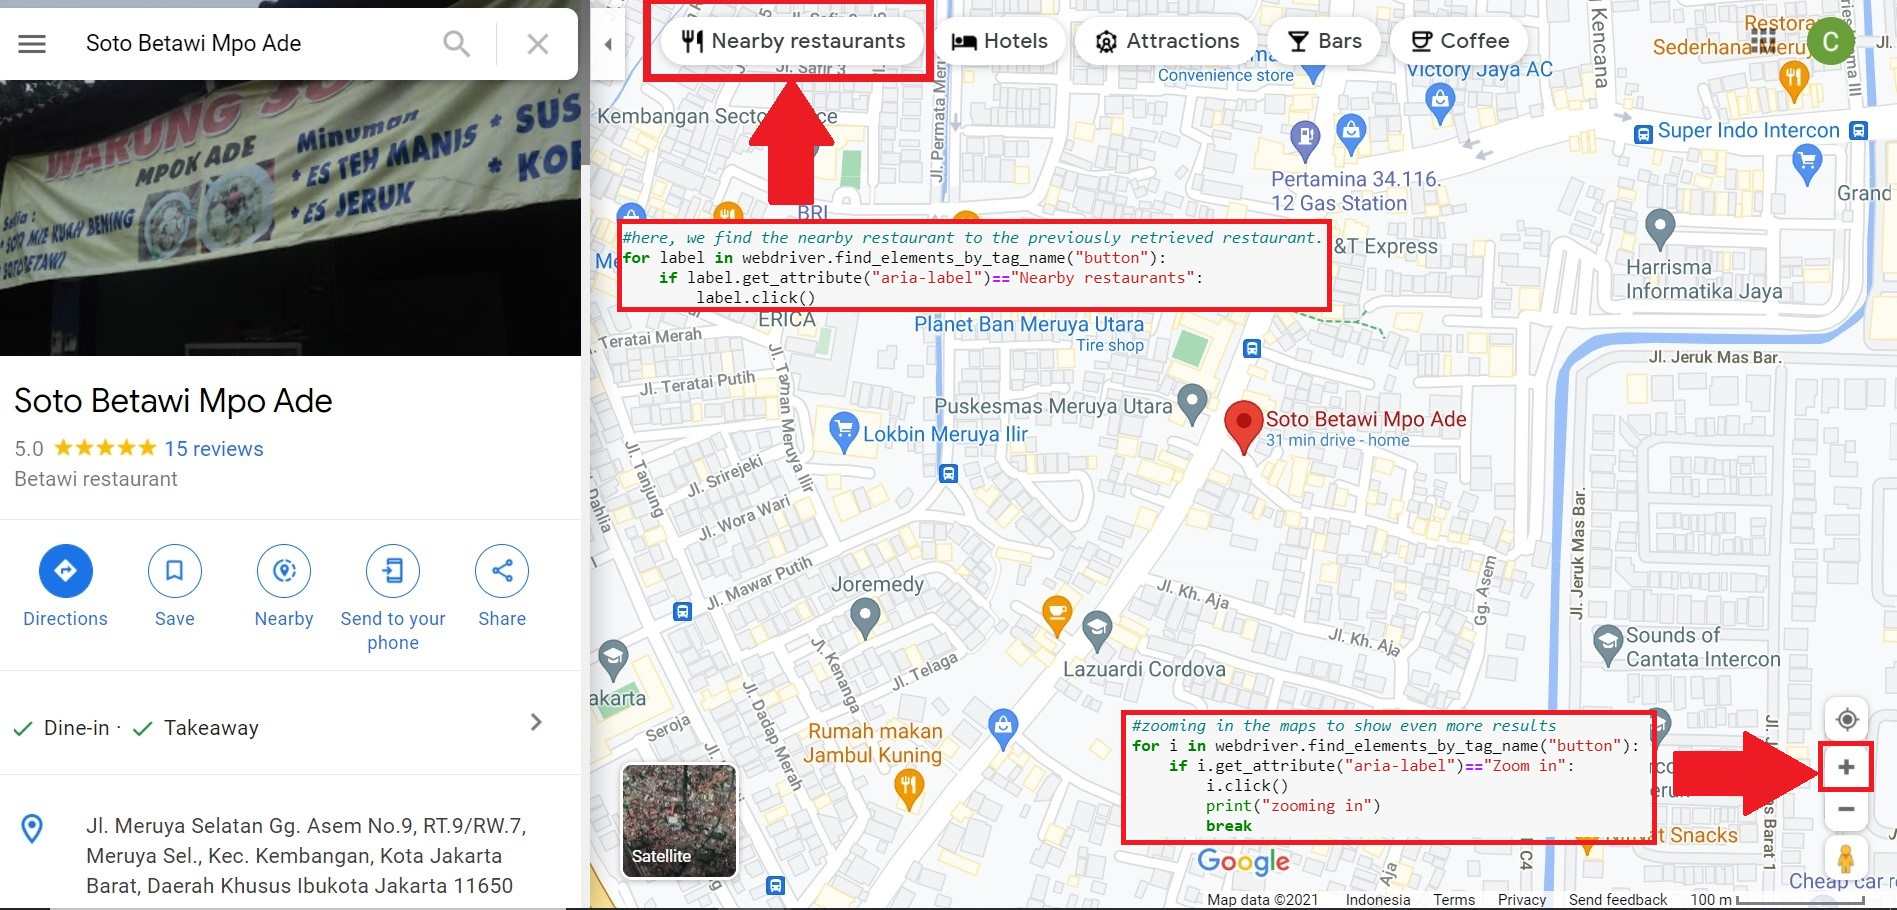

In [ ]:
resto_link_additional=set(resto_link_additional)

In [ ]:
resto_link_additional=[x for x in resto_link_additional if x is not None]

In [ ]:
error=[]

for i in resto_link_additional:
    if "https://www.google.com/maps/place" not in i:
        error.append(i)

In [ ]:
resto_link_additional_clean=[x for x in resto_link_additional if x not in error]

In [ ]:
#listing the data we would like to retrieve
resto_name=[]
resto_address=[]
tel=[]
link=[]

#we open the links retrieved one by one and then get the information needed
for i in resto_link_clean:
    link.append(i)
    webdriver.get(i)
    sleep(5)    
    
    #get the restaurant's name
    name=webdriver.find_element_by_class_name("x3AX1-LfntMc-header-title-title").text
    resto_name.append(name)
    print(len(resto_name))
    print(name)
    
    tex=webdriver.find_elements_by_class_name('QSFF4-text')
    for i in tex:
        # get the restaurant's address
        # you may change "Jl." and "Jalan" to other keyword(s) for address in your country. 
        #"Jl." and "Jalan" is similar to "St." or "Street".
        if "Jl." in i.text or "Jalan" in i.text:
            resto_address.append(i.text)
            print(i.text)
        # get the phone number
        # you may also change the keywords to get the phone numbers.
        if "(021)" in i.text or ("08" or "-") in i.text and "Jl." not in i.text and "Jalan" not in i.text:
            tel.append(i.text)
            print(i.text)
    
    #there is a chance that the address and/or phone number is unavailable. in that case, we give "-" value to them
    try:
        print(resto_address[len(resto_name)-1])
    except:
        resto_address.append("-")
        
    try:
        print(tel[len(resto_name)-1])
    except:
        tel.append("-")

### Make a dataframe to contain the data

In [ ]:
kembangan=pd.DataFrame()
kembangan["Name"]=resto_name
kembangan["Address"]=resto_address
kembangan["Tel"]=tel
kembangan["Link"]=link

### Hereafter is data cleaning that you may suit according to your needs, i.e. deleting the unavailable address and/or phone number.

In [ ]:
empty_tel=[]

for i in range(len(kembangan)):
    if kembangan["Address"][i]=="-" or kembangan["Tel"][i]=="-":
        empty_tel.append(i)
        

In [ ]:
kembangan_clean_2=kembangan.drop(empty_tel).reset_index().drop("index",axis=1)

### Finally, combine all the data retrieved earlier with the zoomed-in data.

In [ ]:
final_df=pd.concat([kembangan_clean, kembangan_clean_2]).drop_duplicates().reset_index().drop("index",axis=1)